In [1]:
import agama
import arepo
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import matplotlib as mpl

from scipy.ndimage import gaussian_filter

from numba import njit
from scipy.signal import savgol_filter

agama.setUnits(mass=1E10, length=1, velocity=1)

'Length unit: 1 Kpc, velocity unit: 1 km/s, time unit: 977.793 Myr, mass unit: 1e+10 Msun, gravitational constant: 43009.2'

In [2]:
basepath = '/n/home01/abeane/starbar/plots/fourier_sphere/data/'

def read_fourier_sphere(name, lvl):
    fname = basepath + 'fourier_' + name + '-' + lvl + '.hdf5'
    t = h5.File(fname, mode='r')
    return t

In [3]:
fourier_N = read_fourier_sphere('Nbody', 'lvl3')
fourier_S = read_fourier_sphere('phantom-vacuum-Sg20-Rc3.5', 'lvl3')

In [4]:
def compute_A1h(t):
    A2r = t['A2r_h'][:]
    A2i = t['A2i_h'][:]
    A1r = t['A1r_h'][:]
    A1i = t['A1i_h'][:]
    A0 = t['A0_h'][:]
    
    A1 = np.sqrt(A1r * A1r + A1i*A1i)
    A2 = np.sqrt(A2r*A2r + A2i*A2i)
    
    return t['time'][:], A1/A0, A2/A0
    

In [5]:
tN, A1_N, A2_N = compute_A1h(fourier_N)
tS, A1_S, A2_S = compute_A1h(fourier_S)

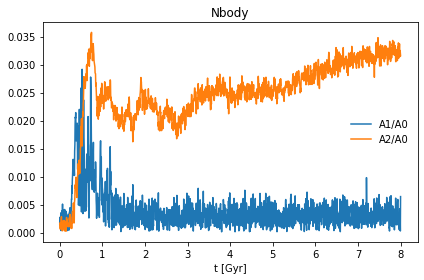

In [6]:
plt.plot(tN, A1_N, label='A1/A0')
plt.plot(tN, A2_N, label='A2/A0')

plt.xlabel('t [Gyr]')

plt.title('Nbody')
plt.legend(frameon=False)

plt.tight_layout()

plt.show()

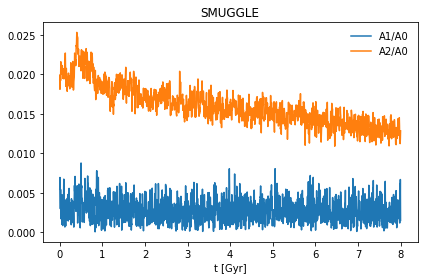

In [7]:
plt.plot(tS, A1_S, label='A1/A0')
plt.plot(tS, A2_S, label='A2/A0')

plt.xlabel('t [Gyr]')

plt.title('SMUGGLE')
plt.legend(frameon=False)

plt.tight_layout()

plt.show()

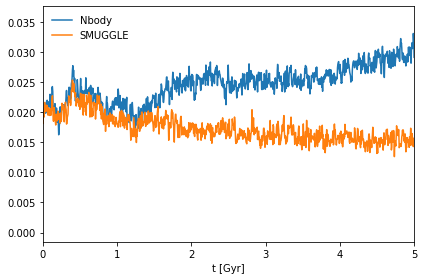

In [10]:
plt.plot(tN - tN[300], A2_N, label='Nbody')
plt.plot(tS, A2_S, label='SMUGGLE')

plt.xlabel('t [Gyr]')

plt.legend(frameon=False)

plt.xlim(0, 5)

plt.tight_layout()

plt.show()